In [1]:
import numpy as np    
import time
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

In [12]:
#complete data set from Iris.csv
data = np.genfromtxt('Iris.csv', delimiter=',')

In [13]:
#X has sepal size
x = data[1:, 1]
#y has petal size
y = data[1:, 3]

In [14]:
print("X_train is of type: ",type(x))
print("Y_train is of type: ",type(y))

X_train is of type:  <class 'numpy.ndarray'>
Y_train is of type:  <class 'numpy.ndarray'>


In [15]:
print ('The shape of x_train is:', x.shape)
print ('The shape of y_train is: ', y.shape)
m=len(x)
print ('Number of training examples (m):', m)

The shape of x_train is: (150,)
The shape of y_train is:  (150,)
Number of training examples (m): 150


In [16]:
#Z-scale normalization
#u is mean
u=np.mean(x)
#si is standard deviation
si=np.std(x)
#X is the new updated and scaled value
X=(x-u)/si
#print(X)

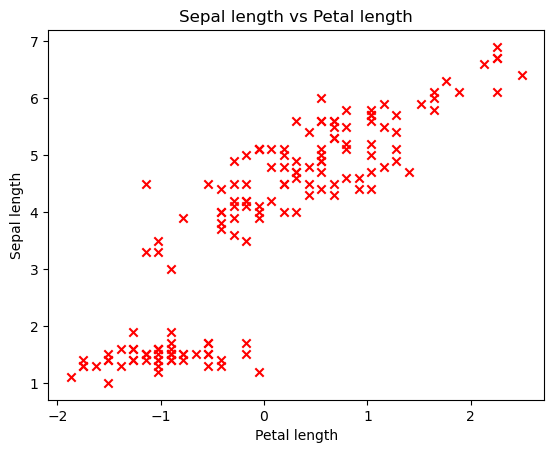

In [17]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(X,y, marker='x', c='r') 

# Set the title
plt.title("Sepal length vs Petal length")
# Set the y-axis label
plt.ylabel('Sepal length')
# Set the x-axis label
plt.xlabel('Petal length')
plt.show()

In [21]:
#compute cost function, that computes cost
""" 
J=1/2m (sum(f(x[i])-y[i]))^2
"""
def compute_cost(x,y,w,b):
    """
    compute cost
    Args:
      X (ndarray (m,)) : Data, m examples 
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    n=x.shape[0]
    J_wb=0
    cost=0
    for i in range(n):
        f_wb=w*x[i]+b
        cost+= (f_wb-y[i])**2
    J_wb=cost/(2*m)
    return J_wb

In [22]:
#TEST
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x, Y, initial_w, initial_b)
print(type(cost))
print("Cost at initial w (zeros):", cost)


NameError: name 'Y' is not defined

In [23]:
#deturns the vlue of partial diff of J_w,b
def compute_gradient(x,y,w,b):
    dj_b=0
    dj_w=0
    n=x.shape[0]
    
    for i in range(n):
        f=w*x[i]+b
        dj_b+=f-y[i]
        dj_w+=(f-y[i])*x[i]
    dj_b/=n
    dj_w/=n
    return dj_w,dj_b

In [24]:
# TEST
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(X, y ,initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -1.5330051263757019 -3.7586666666666693


In [25]:
def gradient_descent(x,y,w_init,b_init,cost_function, gradient_function, alpha, iters):
    n=x.shape[0]
    
    J_history=[]
    w_history=[] 
    w=copy.deepcopy(w_init)#copy.deepcopy() copies all the attributes of the copied list, but creates no assotiation to the original list. This helps in preserving original values
    b=b_init
    
    for i in range(n):
        dj_w, dj_b = gradient_function(x, y, w, b )
        
        w=w-alpha*dj_w
        b=b-alpha*dj_b 
        
        #if i<100000: 
        cost = cost_function(x,y,w,b)
        J_history.append(cost)
        
        #if i% math.ceil(iters/10) == 0:
        w_history.append(w)
        #print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history
        

In [26]:
initial_w = 0. #w_init
initial_b = 0. #b_init

# some gradient descent settings

iterations = 1500
alpha = 0.01

w,b,J_h,w_h = gradient_descent( x ,y, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)
#print("W_history shape=",len(w_h))
#print("J_history shape=",len(J_h))

w,b found by gradient descent: 0.682097988961393 -0.09387498266456962


In [27]:
m = x.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x[i] + b

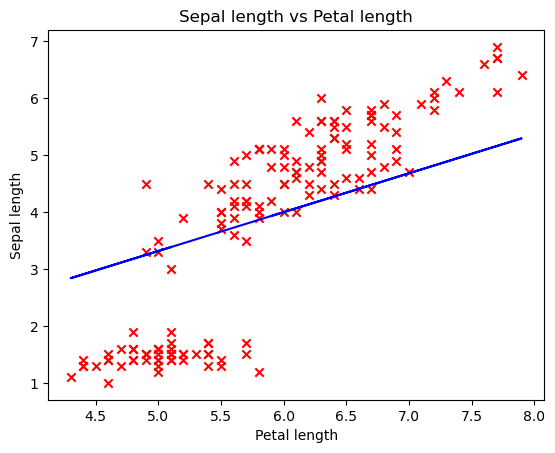

In [28]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x,y, marker='x', c='r') 
#plt.scatter(X,predicted, marker='x', c='b') 
plt.plot(x,predicted, c='b') 



# Set the title
plt.title("Sepal length vs Petal length")
# Set the y-axis label
plt.ylabel('Sepal length')
# Set the x-axis label
plt.xlabel('Petal length')
plt.show()

In [29]:
predict1 = 5.5 * w + b
print('For sepal size=5.5 petal size is: ',predict1,"(should be 1.3)")
predict2 = 6.9 * w + b
print('For sepal size=4.8 petal size is: ',predict2,"(should be 4.9)")

For sepal size=5.5 petal size is:  3.6576639566230913 (should be 1.3)
For sepal size=4.8 petal size is:  4.6126011411690415 (should be 4.9)


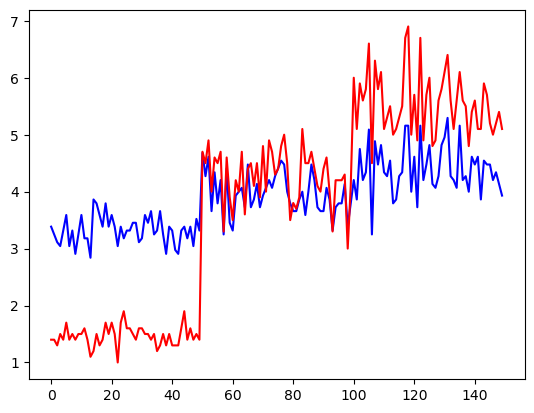

In [31]:
plt.plot(predicted,c='b')
plt.plot(y,c="r")

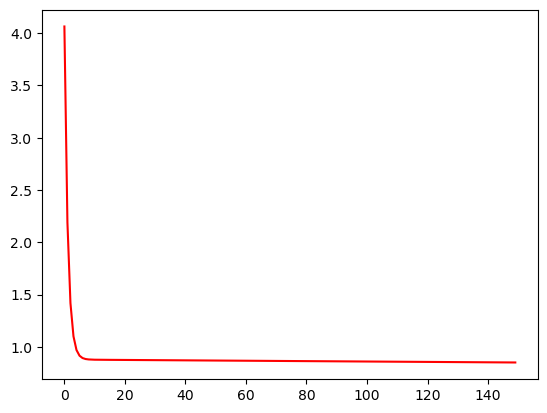

In [33]:
plt.plot(J_h, c='r')